<a href="https://colab.research.google.com/github/pujaroy280/Data-Analytics-Microcredential/blob/main/(PR)Heart_Attack_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction (Problem Statement)

Heart attacks are one the most notorious chronic illnesses that might target an individual based on their health or physical attributes. In this dataset, I will analyze several features such as Sex, Age, BMI, Diabetes and Heart Attack to draw conclusions on whether or not the patient is at risk of getting a heart attack( "1" is when there is a risk and "0" means there is no risk).



---



In [2]:
# loading necessary libaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## Loading the Data

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/pujaroy280/ML-Data/main/heart_attack.csv")
df.head()

,male,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,heart_attack
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## EDA (Exploratory Data Analysis)

In [4]:
df.describe()

,male,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,heart_attack
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3656 entries, 0 to 3655
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   male              3656 non-null   int64  
 1   age               3656 non-null   int64  
 2   education         3656 non-null   float64
 3   current_smoker    3656 non-null   int64  
 4   cigs_per_day      3656 non-null   float64
 5   bp_meds           3656 non-null   float64
 6   prevalent_stroke  3656 non-null   int64  
 7   prevalent_hyp     3656 non-null   int64  
 8   diabetes          3656 non-null   int64  
 9   tot_chol          3656 non-null   float64
 10  sys_bp            3656 non-null   float64
 11  dia_bp            3656 non-null   float64
 12  bmi               3656 non-null   float64
 13  heart_rate        3656 non-null   float64
 14  glucose           3656 non-null   float64
 15  heart_attack      3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 457.

In [6]:
df.isnull().sum()

male                0
age                 0
education           0
current_smoker      0
cigs_per_day        0
bp_meds             0
prevalent_stroke    0
prevalent_hyp       0
diabetes            0
tot_chol            0
sys_bp              0
dia_bp              0
bmi                 0
heart_rate          0
glucose             0
heart_attack        0
dtype: int64

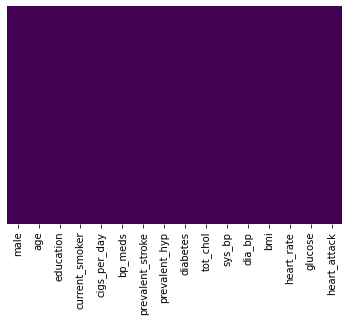

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap='viridis') # seeing if there really arent any null values

##  Data Visualizations

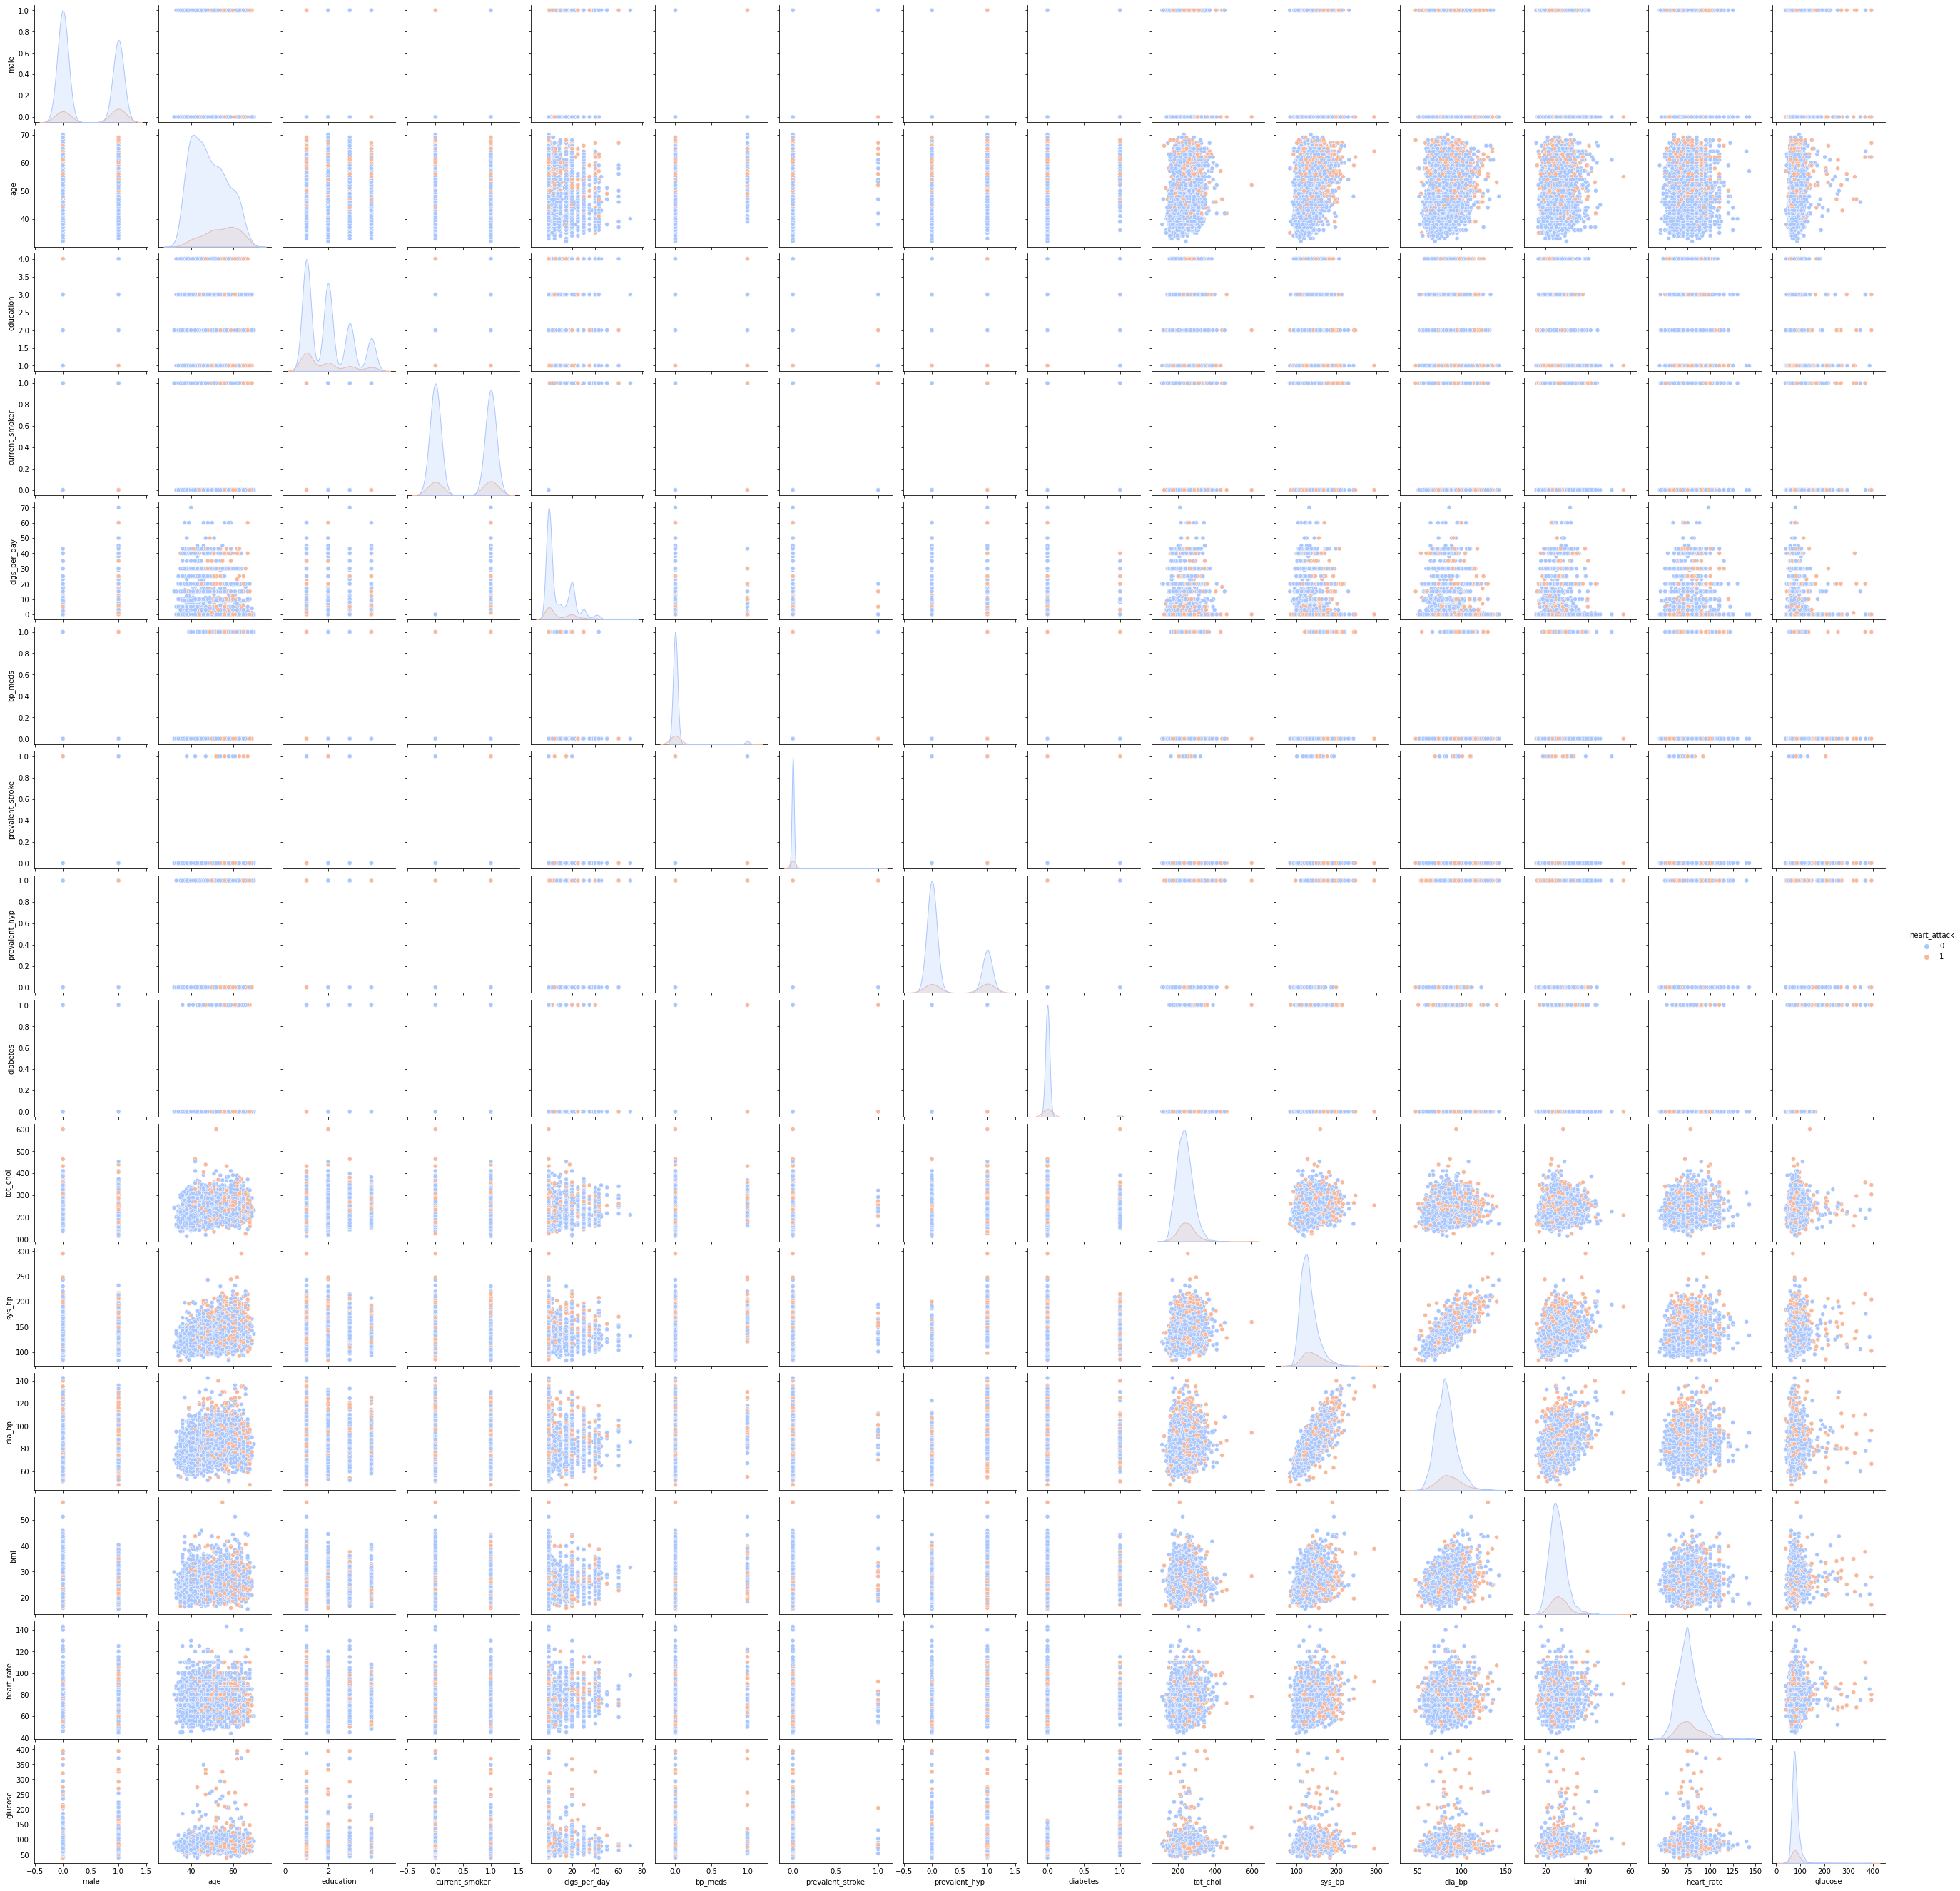

In [8]:
sns.pairplot(df, hue='heart_attack', palette='coolwarm') # catch all plots to see the where the correlations reside

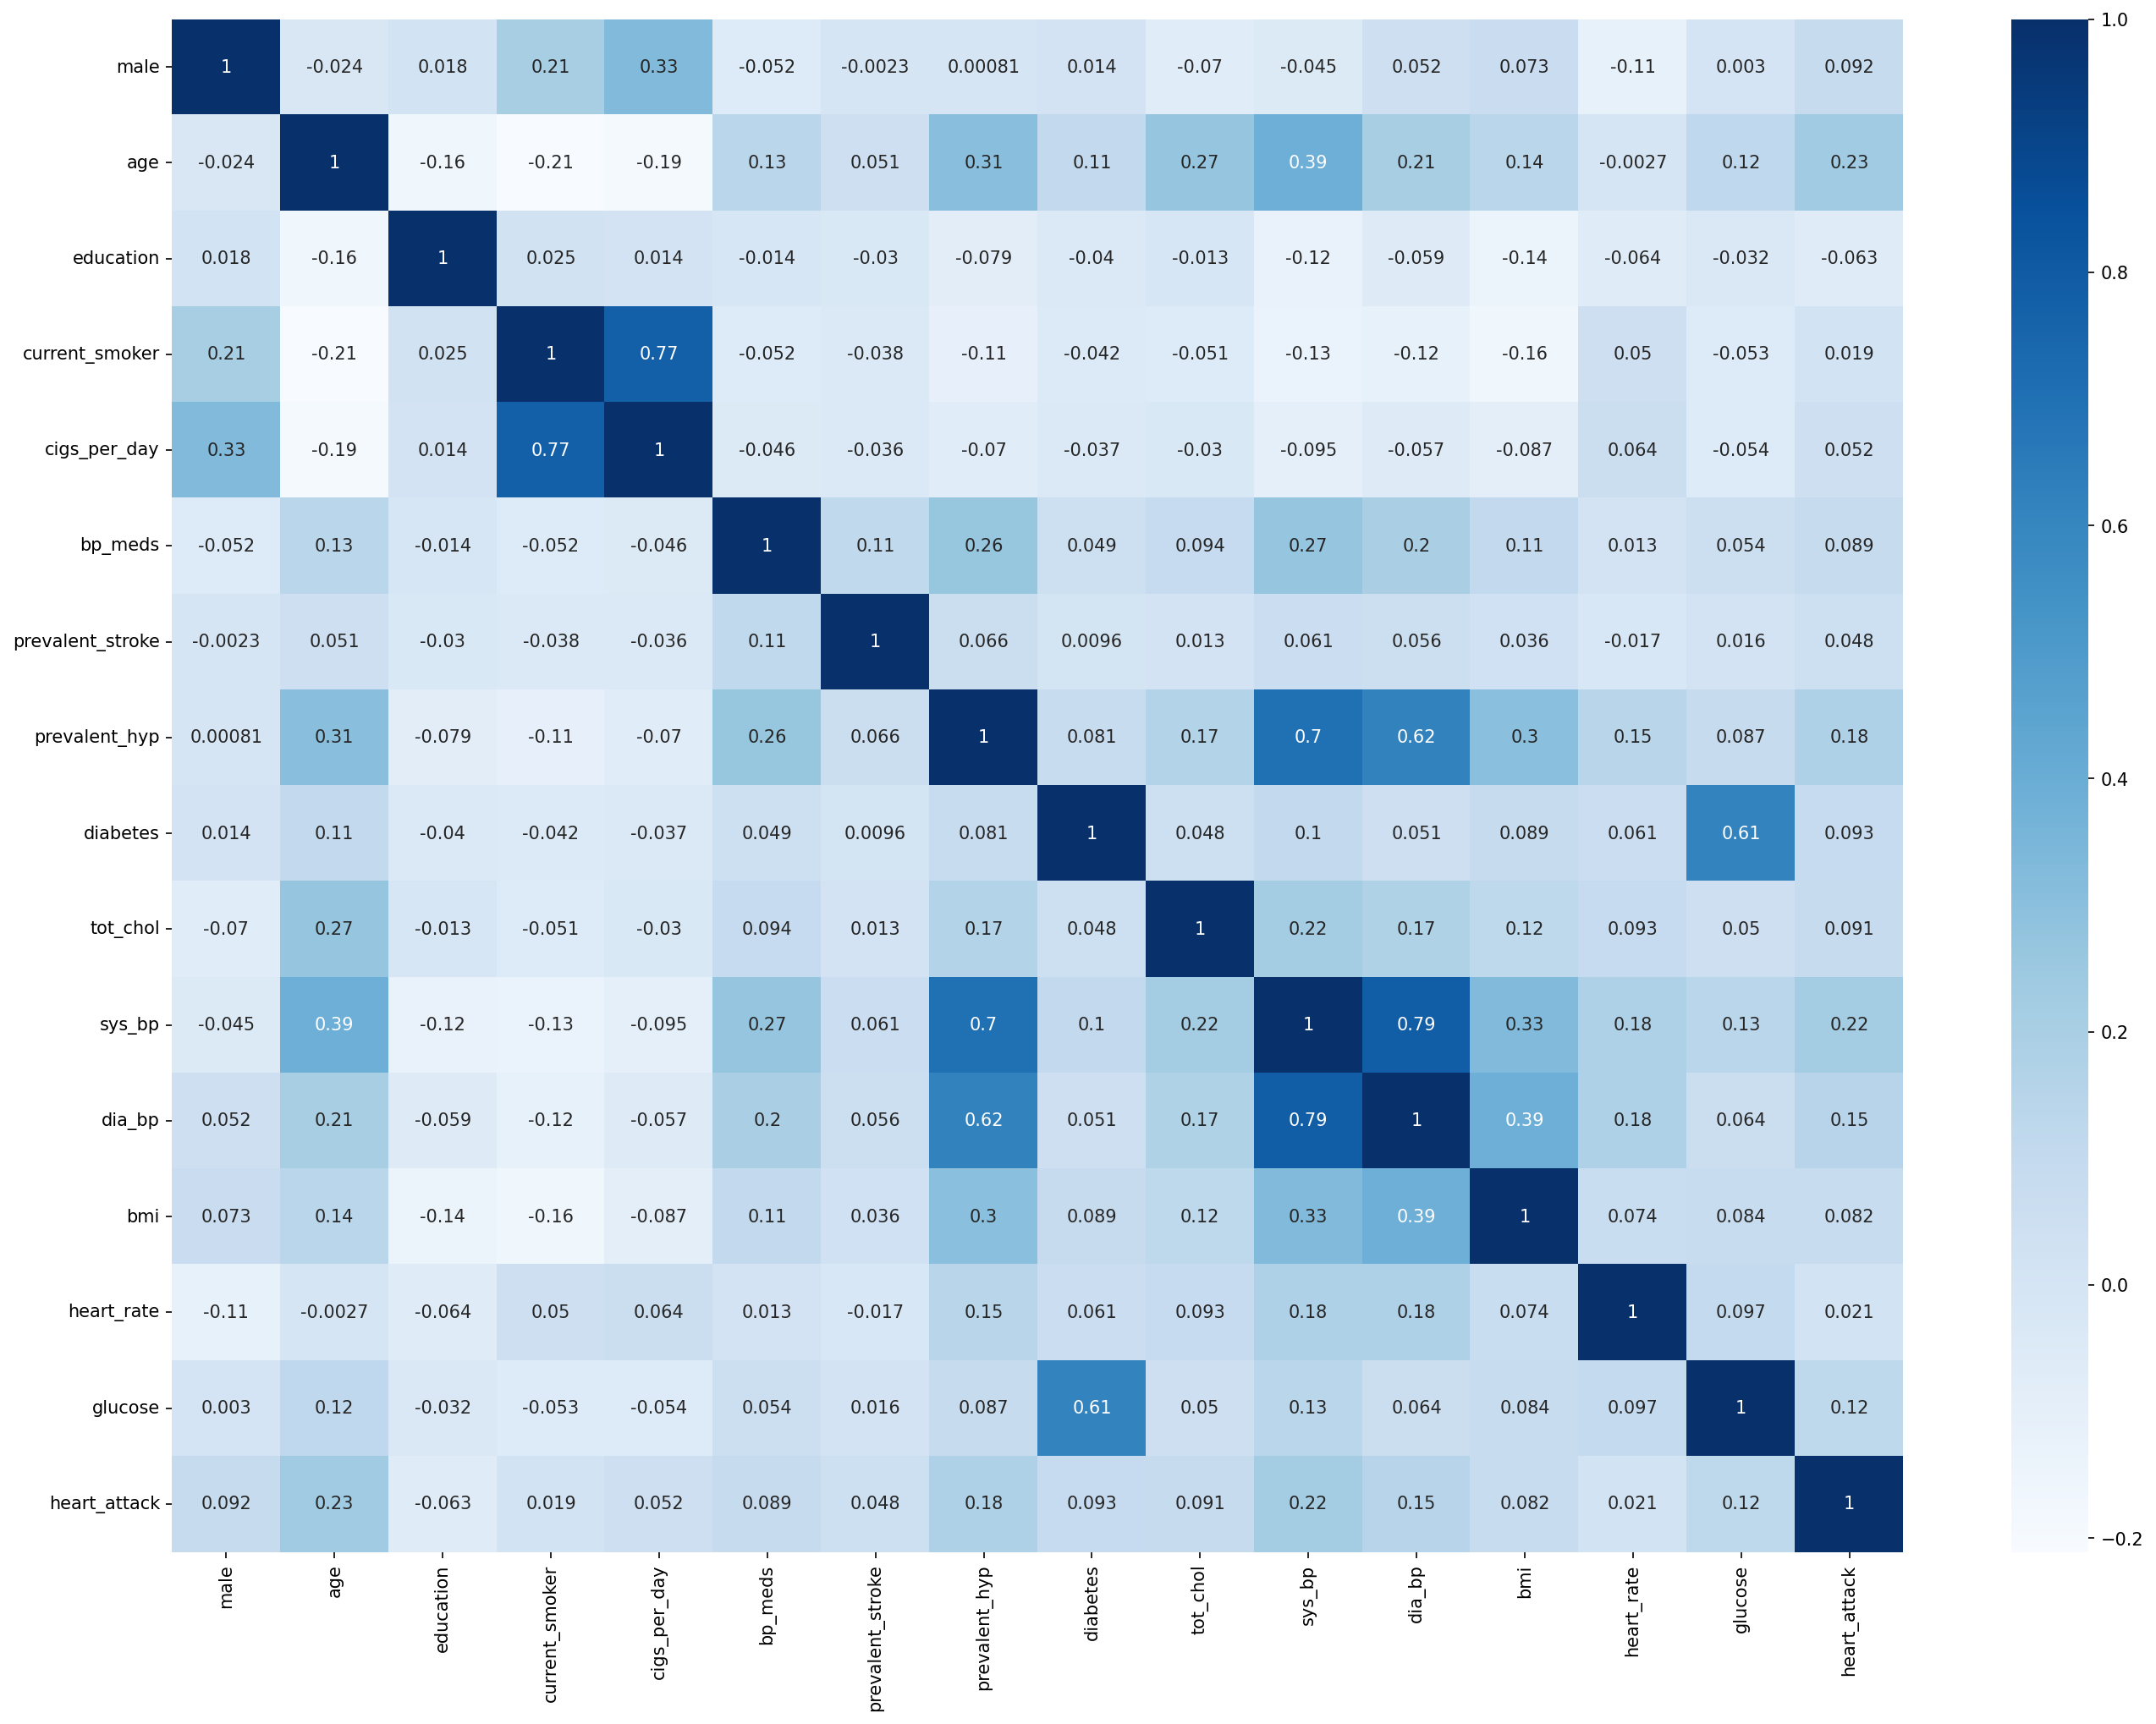

In [9]:
plt.figure(figsize=(22,16), dpi=150)
sns.heatmap(df.corr(), annot=True,cmap='Blues')

# the correlated features are: diabetes, current smoker
# the correlated features with heart attacks are: age, prevalent_hyp, sys_bp, dia_bp

0    3099
1     557
Name: heart_attack, dtype: int64


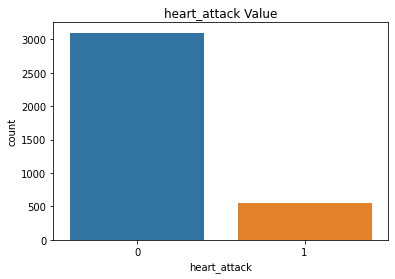

In [10]:
# looking into the label 
print(df.heart_attack.value_counts())

sns.countplot(x = "heart_attack", data = df)
plt.title("heart_attack Value")
plt.show()

# Data mostly shows that they aren't at risk of getting heart attacks

### exploring the features that have strong correlation but not with heart attack

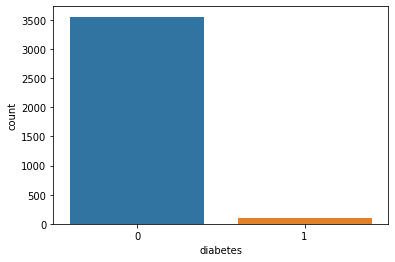

In [11]:
# exploring diabetes feature
sns.countplot(data=df, x='diabetes') # more than 3,000 patients do not have diabetes in our database so might not use for our features

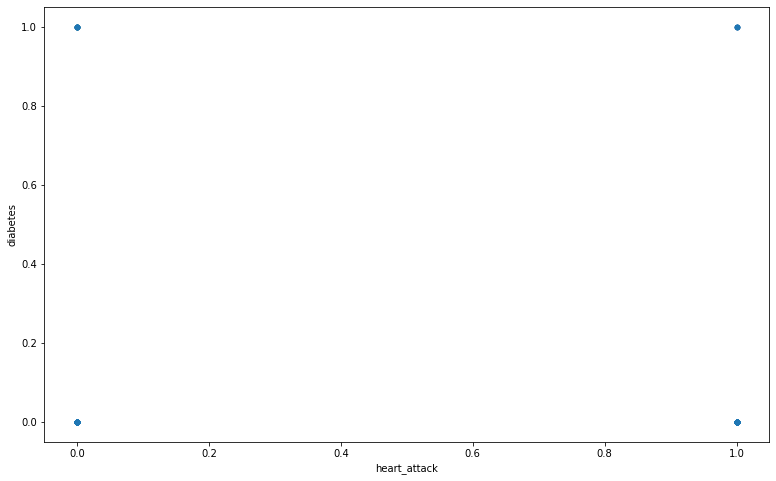

In [12]:
df.plot(kind='scatter', x='heart_attack', y='diabetes', figsize=(13,8), alpha=0.2); # there is an even split for a high/low risk for those patients who have diabetes or dont have 

In [13]:
print(df.diabetes.value_counts()) 

0    3557
1      99
Name: diabetes, dtype: int64


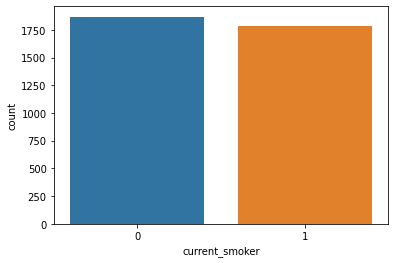

In [14]:
# # exploring current smokers feature
sns.countplot(data=df, x='current_smoker')  # there is similar split between those who are smokers currently 

In [15]:
print(df.current_smoker.value_counts())

0    1868
1    1788
Name: current_smoker, dtype: int64


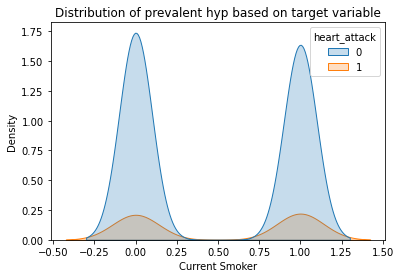

In [16]:
ax2 = sns.kdeplot(x ='current_smoker', data= df, hue= 'heart_attack', shade= True)
ax2.set(xlabel = 'Current Smoker', title= 'Distribution of prevalent hyp based on target variable');

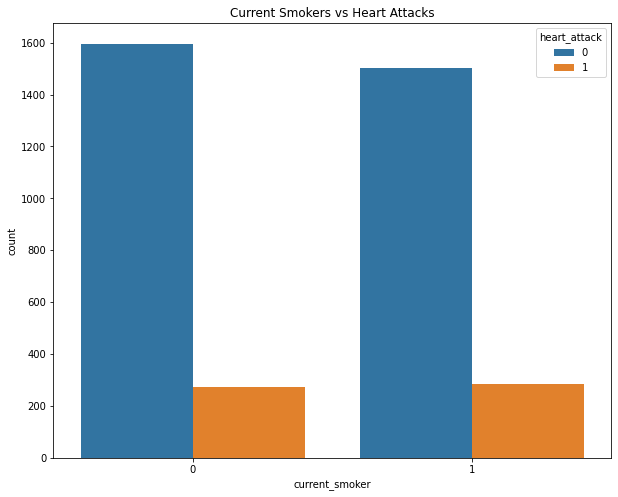

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(x=df.current_smoker, data = df, hue='heart_attack')
plt.title("Current Smokers vs Heart Attacks")
plt.show()

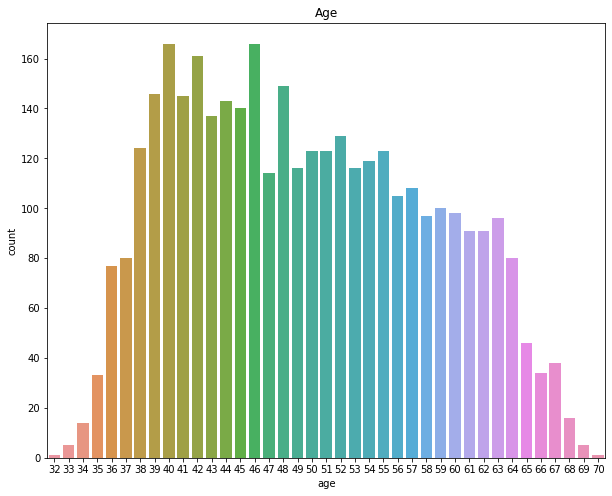

In [18]:
# these have strong correlation with heart attack

# starting off with age, it seems that most are in in their mid 30s to 60s
plt.figure(figsize=(10,8))
sns.countplot(x=df.age, data = df)
plt.title("Age")
plt.show()

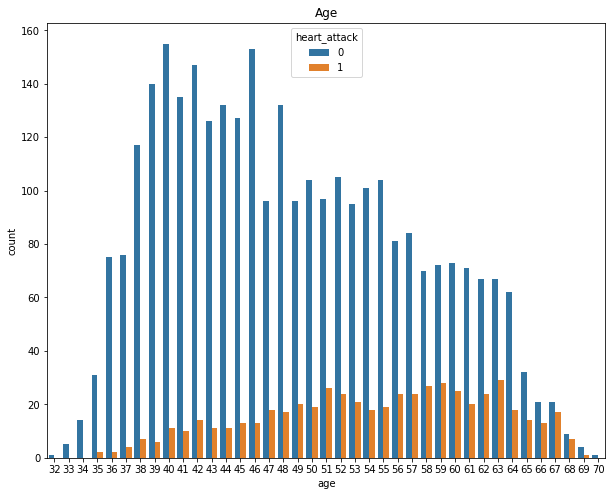

In [19]:
# showing how what ages have or not have attack attacks
plt.figure(figsize=(10,8))
sns.countplot(x=df.age, data = df, hue='heart_attack')
plt.title("Age")
plt.show()

# most ages dont have heart attacks but those who do range from 35 to 69 years old

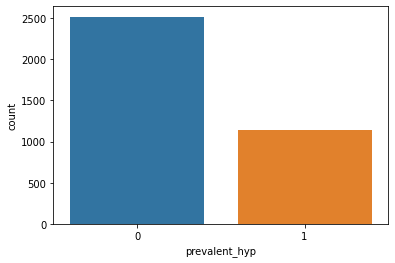

In [20]:
# looking into prevalent hyp
sns.countplot(data=df, x='prevalent_hyp') # most dont have heart attacks but almost half of those who dont do have heart attacks

In [21]:
print(df.prevalent_hyp.value_counts())

0    2517
1    1139
Name: prevalent_hyp, dtype: int64


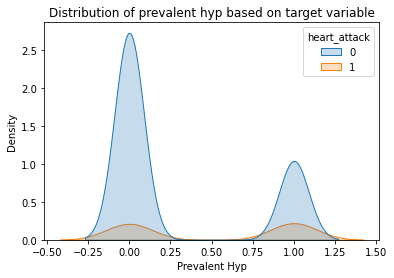

In [22]:
ax2 = sns.kdeplot(x ='prevalent_hyp', data= df, hue= 'heart_attack', shade= True)
ax2.set(xlabel = 'Prevalent Hyp', title= 'Distribution of prevalent hyp based on target variable');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


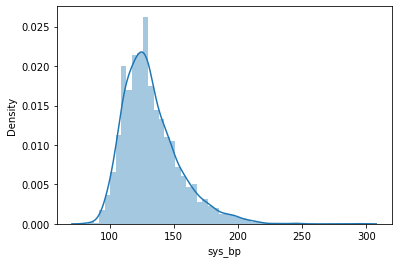

In [23]:
# looking into sys_bp && dia_bp
sns.distplot(df.sys_bp)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


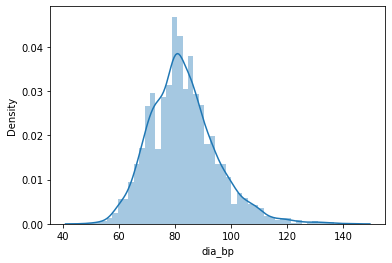

In [24]:
sns.distplot(df.dia_bp)

## Choosing our features and label

In [25]:
df.columns

Index(['male', 'age', 'education', 'current_smoker', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'tot_chol', 'sys_bp',
       'dia_bp', 'bmi', 'heart_rate', 'glucose', 'heart_attack'],
      dtype='object')

In [26]:
X = df[['age', 'prevalent_hyp', 'sys_bp', 'dia_bp']] # features
y = df['heart_attack'] # label

## Performing Logistic Regression

In [27]:
# importing libraries needed to conduct ml model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1234)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

scaled_x_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [30]:
model = LogisticRegression()
model.fit(scaled_x_train, y_train) # fitting the model
predictions = model.predict(scaled_x_test)

In [31]:
print(classification_report(y_test, predictions)) # this model with a train split of 30 percent has an accuracy of 87 percent 

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       954
           1       0.40      0.01      0.03       143

    accuracy                           0.87      1097
   macro avg       0.64      0.51      0.48      1097
weighted avg       0.81      0.87      0.81      1097





---




In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1234)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

scaled_x_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [34]:
model = LogisticRegression()
model.fit(scaled_x_train, y_train) # fitting the model
predictions = model.predict(scaled_x_test)

In [35]:
print(classification_report(y_test, predictions)) # this model with a train split of 20 percent has an accuracy of 88 percent which increased from a split of 30 percent 

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       643
           1       0.43      0.03      0.06        89

    accuracy                           0.88       732
   macro avg       0.65      0.51      0.50       732
weighted avg       0.83      0.88      0.83       732





---






In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 1234)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

scaled_x_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [38]:
model = LogisticRegression()
model.fit(scaled_x_train, y_train) # fitting the model
predictions = model.predict(scaled_x_test)

In [39]:
print(classification_report(y_test, predictions)) # this model with a train split of 10 percent has an accuracy of 88 percent which is the same accuracy score for a split of 20 percent

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       324
           1       0.00      0.00      0.00        42

    accuracy                           0.88       366
   macro avg       0.44      0.50      0.47       366
weighted avg       0.78      0.88      0.83       366



## Performing Random Forest

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 1234)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

scaled_x_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(scaled_x_train, y_train)

RandomForestClassifier()

In [43]:
rfc_pred = rfc.predict(scaled_x_test)

In [44]:
print(classification_report(y_test, rfc_pred)) # this model with a train split of 10 percent has an accuracy of 84 percent 

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       324
           1       0.24      0.12      0.16        42

    accuracy                           0.86       366
   macro avg       0.57      0.53      0.54       366
weighted avg       0.82      0.86      0.83       366





---



In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1234)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

scaled_x_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(scaled_x_train, y_train)

RandomForestClassifier()

In [48]:
rfc_pred = rfc.predict(scaled_x_test)

In [49]:
print(classification_report(y_test, rfc_pred)) # this model with a train split of 20 percent has an accuracy of 84 percent which is the same accuracy score for a split of 10 percent

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       643
           1       0.20      0.10      0.13        89

    accuracy                           0.84       732
   macro avg       0.54      0.52      0.52       732
weighted avg       0.80      0.84      0.82       732





---



In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1234)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

scaled_x_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(scaled_x_train, y_train)

RandomForestClassifier()

In [53]:
rfc_pred = rfc.predict(scaled_x_test)

In [54]:
print(classification_report(y_test, rfc_pred)) # this model with a train split of 30 percent has an accuracy of 84 percent which is the same accuracy score for all the test train splits done

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       954
           1       0.21      0.09      0.13       143

    accuracy                           0.84      1097
   macro avg       0.54      0.52      0.52      1097
weighted avg       0.79      0.84      0.81      1097



# Conclusion:


Throughout this data analysis, I explored the dataset to predict whether a patient is at risk for a heart attack based on their health condition, sex, etc. The correlated features that resulted regarding the label, heart attack, consisted of their age, prevalent_hyp, sys_bp and dia_bp. I leveraged two ML models to observe which model can predict and evaluate with a high accuracy in who is at risk for a heart attack based on the provided features in the dataset.

The logistic regression machine learning model resulted in a higher accuracy score with fewer splitted data. Likewise, the Random Forest algorithm scored a similar accuracy score based on how the data was split. Based on the performance of both models, the logistic regression model performed better than the random forest model due to an increasing accuracy score whereas, the accuracy of the random forest algorithm remained constant. 